In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [2]:
dataset=pd.read_csv("DIABETES DATASET.csv", delimiter=",")
dataset

,No. of Pregnancy,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
0,3,50,22.263762,140,90,0,0,317.50,14.6,1
1,1,40,24.111159,110,80,2,0,317.50,6.1,0
2,0,21,17.183204,120,80,0,0,259.08,9.7,1
3,2,30,21.244332,130,85,0,0,322.58,17.8,1
4,2,35,22.819490,110,75,0,0,335.28,16.7,1
...,...,...,...,...,...,...,...,...,...,...
460,2,35,24.193597,130,90,2,0,292.10,8.1,1
461,2,40,22.077443,140,90,0,0,279.40,6.9,0
462,3,28,26.489311,140,100,0,0,317.50,12.0,1
463,2,35,22.580690,110,80,0,0,292.10,20.0,1


In [3]:
dataset.columns

Index(['No. of Pregnancy', 'Age', 'BMI', 'BP(Systolic)', 'BP(Diastolic)',
       'Genetic', 'Insulin', 'Skin Thickness(mm)', 'Glucose Consumption',
       'Outcome'],
      dtype='object')

In [4]:
dataset.shape

(465, 10)

In [5]:
dataset.describe()

,No. of Pregnancy,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,3.047312,44.296774,25.178749,119.141935,79.425806,1.526882,5.156989,306.878430,13.739806,0.800000
std,1.845871,12.833738,3.765211,13.959504,10.695198,1.664742,8.992998,34.630121,6.519517,0.400431
min,0.000000,21.000000,17.183204,80.000000,30.000000,0.000000,0.000000,29.210000,5.000000,0.000000
25%,2.000000,35.000000,22.580690,110.000000,70.000000,0.000000,0.000000,284.480000,8.000000,1.000000
50%,3.000000,42.000000,24.576776,120.000000,80.000000,1.000000,0.000000,304.800000,12.800000,1.000000
75%,4.000000,53.000000,27.492665,130.000000,80.000000,2.000000,10.000000,330.200000,17.500000,1.000000
max,12.000000,86.000000,37.442807,180.000000,120.000000,8.000000,44.000000,406.400000,45.000000,1.000000


In [6]:
dataset.head(5)

,No. of Pregnancy,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
0,3,50,22.263762,140,90,0,0,317.50,14.6,1
1,1,40,24.111159,110,80,2,0,317.50,6.1,0
2,0,21,17.183204,120,80,0,0,259.08,9.7,1
3,2,30,21.244332,130,85,0,0,322.58,17.8,1
4,2,35,22.819490,110,75,0,0,335.28,16.7,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No. of Pregnancy     465 non-null    int64  
 1   Age                  465 non-null    int64  
 2   BMI                  465 non-null    float64
 3   BP(Systolic)         465 non-null    int64  
 4   BP(Diastolic)        465 non-null    int64  
 5   Genetic              465 non-null    int64  
 6   Insulin              465 non-null    int64  
 7   Skin Thickness(mm)   465 non-null    float64
 8   Glucose Consumption  465 non-null    float64
 9   Outcome              465 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 36.5 KB


# Check missing values

In [8]:
#Cheking missing values
dataset.isnull().sum()

No. of Pregnancy       0
Age                    0
BMI                    0
BP(Systolic)           0
BP(Diastolic)          0
Genetic                0
Insulin                0
Skin Thickness(mm)     0
Glucose Consumption    0
Outcome                0
dtype: int64

# Outlier Detection

<AxesSubplot:>

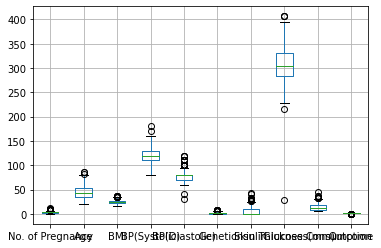

In [9]:
#detecting outlier
dataset.boxplot()

In [10]:
a = dataset.iloc[: , 0:9]
b = dataset.iloc[: , 9]

# Outlier detection replacement by median using z-score

In [11]:
from scipy.stats import zscore

numeric_cols=a.select_dtypes(include=[np.number]).columns
z=a[numeric_cols].apply(zscore).abs()
print(z)

     No. of Pregnancy       Age       BMI  BP(Systolic)  BP(Diastolic)  \
0            0.025659  0.444872  0.775023      1.495793       0.989751   
1            1.110325  0.335164  0.283846      0.655595       0.053745   
2            1.652658  1.817231  2.125819      0.061534       0.053745   
3            0.567992  1.115199  1.046065      0.778664       0.521748   
4            0.567992  0.725181  0.627269      0.655595       0.414258   
..                ...       ...       ...           ...            ...   
460          0.567992  0.725181  0.261928      0.778664       0.989751   
461          0.567992  0.335164  0.824561      1.495793       0.989751   
462          0.025659  1.271206  0.348446      1.495793       1.925757   
463          0.567992  0.725181  0.690760      0.655595       0.053745   
464          0.025659  0.491171  0.741743      0.061534       0.882261   

      Genetic   Insulin  Skin Thickness(mm)  Glucose Consumption  
0    0.918176  0.574063            0.307045 

In [12]:
my_cols=['No. of Pregnancy', 'Age', 'BMI', 'BP(Systolic)', 'BP(Diastolic)',
       'Genetic', 'Insulin', 'Skin Thickness(mm)', 'Glucose Consumption']
for col in my_cols:
    z.loc[z[col]>3,col]=np.nan

In [13]:
z.isnull().sum()

No. of Pregnancy       9
Age                    2
BMI                    4
BP(Systolic)           2
BP(Diastolic)          5
Genetic                5
Insulin                2
Skin Thickness(mm)     1
Glucose Consumption    4
dtype: int64

In [14]:
d=z.fillna(z.median())

In [15]:
d.isnull().sum()

No. of Pregnancy       0
Age                    0
BMI                    0
BP(Systolic)           0
BP(Diastolic)          0
Genetic                0
Insulin                0
Skin Thickness(mm)     0
Glucose Consumption    0
dtype: int64

In [16]:
new=pd.concat([d,b],axis=1)
new.head()

,No. of Pregnancy,Age,BMI,BP(Systolic),BP(Diastolic),Genetic,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
0,0.025659,0.444872,0.775023,1.495793,0.989751,0.918176,0.574063,0.307045,0.132083,1
1,1.110325,0.335164,0.283846,0.655595,0.053745,0.284505,0.574063,0.307045,1.173098,0
2,1.652658,1.817231,2.125819,0.061534,0.053745,0.918176,0.574063,1.381742,0.620315,1
3,0.567992,1.115199,1.046065,0.778664,0.521748,0.918176,0.574063,0.453896,0.623446,1
4,0.567992,0.725181,0.627269,0.655595,0.414258,0.918176,0.574063,0.821024,0.454540,1


In [17]:
X= new.iloc[:,new.columns !="Outcome"]
y= new.iloc[:,new.columns == "Outcome"]

In [18]:
y=new["Outcome"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Outcome, dtype: int64

# Balancing outcome by SMOTE

In [19]:
#Lets check if the data is Balanced or not
round(dataset.Outcome.value_counts(normalize = True),2)

1    0.8
0    0.2
Name: Outcome, dtype: float64

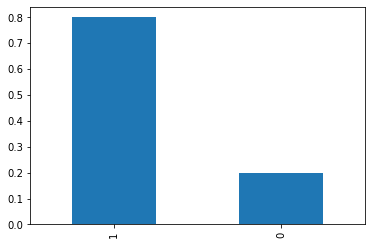

In [20]:
# Bar plot with respec to Outcoome 1 and 0 
round(dataset.Outcome.value_counts(normalize = True),2).plot.bar()
plt.show()

In [21]:
from imblearn.over_sampling  import SMOTE
smt= SMOTE()
data_X, data_y =smt.fit_resample(X, y)

In [22]:
print(data_X.shape)
print(data_y.shape)

(744, 9)
(744,)


<AxesSubplot:>

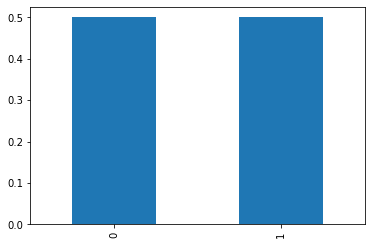

In [23]:
data_y.value_counts(normalize = True).plot.bar()

# Data scaling

In [24]:
from sklearn.preprocessing import StandardScaler
trans= StandardScaler()
trans.fit(data_X)
X=trans.fit_transform(data_X)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data_X,data_y,test_size=0.30,random_state=7)

# Building first layer model

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.svm import SVC
svc= SVC()


# Training Decision Tree

In [27]:
model_dtc = dtc.fit(X_train,y_train)   # fitting Training Set
pred_dtc = model_dtc.predict(X_test)   # Predicting on test dataset
 

In [28]:
from sklearn.metrics import accuracy_score
acc_dtc = accuracy_score(y_test, pred_dtc)  # evaluating accuracy score

print('accuracy score of DecisionTreeClassifier is:', acc_dtc)

accuracy score of DecisionTreeClassifier is: 0.9642857142857143


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test,pred_dtc))

[[118   4]
 [  4  98]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       122
           1       0.96      0.96      0.96       102

    accuracy                           0.96       224
   macro avg       0.96      0.96      0.96       224
weighted avg       0.96      0.96      0.96       224



# Training RandomForestClassifier

In [30]:
model_rfc = rfc.fit(X_train,y_train)   # fitting Training Set
pred_rfc = model_rfc.predict(X_test)   # Predicting on test dataset

In [31]:
from sklearn.metrics import accuracy_score
acc_rfc = accuracy_score(y_test, pred_rfc)  # evaluating accuracy score

print('accuracy score of RandomForestClassifier is:', acc_rfc)

accuracy score of RandomForestClassifier is: 0.9508928571428571


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test,pred_rfc))

[[116   6]
 [  5  97]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       122
           1       0.94      0.95      0.95       102

    accuracy                           0.95       224
   macro avg       0.95      0.95      0.95       224
weighted avg       0.95      0.95      0.95       224



# Training Support Vector Machine

In [33]:
model_svc = svc.fit(X_train,y_train)   # fitting Training Set

pred_svc = model_svc.predict(X_test)   # Predicting on test dataset
 

In [34]:
from sklearn.metrics import accuracy_score
acc_svc = accuracy_score(y_test, pred_svc)  # evaluating accuracy score

print('accuracy score of SupportVectorMachineClassifier is:', acc_svc)

accuracy score of SupportVectorMachineClassifier is: 0.90625


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test,pred_svc))

[[119   3]
 [ 18  84]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       122
           1       0.97      0.82      0.89       102

    accuracy                           0.91       224
   macro avg       0.92      0.90      0.90       224
weighted avg       0.91      0.91      0.91       224



In [36]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
lr = LogisticRegression()  # defining meta-classifier

clf_stack = StackingClassifier(classifiers =[dtc,rfc,svc], meta_classifier = lr)
 

# Traing Stacking Model

In [37]:
from mlxtend.classifier import StackingClassifier

model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test)       # predictions on test data using stacked model
 

# evaluating accuracy

In [38]:
acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy

print('accuracy score of Stacked model:', acc_stack)

accuracy score of Stacked model: 0.9598214285714286


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred_stack))
print(classification_report(y_test,pred_stack))

[[118   4]
 [  5  97]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       122
           1       0.96      0.95      0.96       102

    accuracy                           0.96       224
   macro avg       0.96      0.96      0.96       224
weighted avg       0.96      0.96      0.96       224

